In [7]:
%matplotlib inline
from netpyne import specs, sim
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np

In [2]:
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters


## Cell parameters
netParams.cellParams['pyr'] = {
    'secs': {
        'soma': {
            'geom': {
                'diam': 18.8,   
                'L': 18.8, 
                'Ra': 123.0},
            'mechs': {
                'hh': {
                    'gnabar': 0.12, 
                    'gkbar': 0.036, 
                    'gl': 0.0003, 
                    'el': -70}
            },
            'ions':{
                'k': {
                    'e': -85,
                }
                
            }
        }
    }
}                


## Population parameters
netParams.popParams['E'] = {
    'cellType': 'pyr', 
    'numCells': 40}

netParams.popParams['I'] = {
    'cellType': 'pyr', 
    'numCells': 10}


## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {
    'mod': 'Exp2Syn', 
    'tau1': 0.1, 
    'tau2': 5.0, 
    'e': 0}  # excitatory synaptic mechanism

netParams.synMechParams['inh'] = {
    'mod': 'Exp2Syn', 
    'tau1': 0.1, 
    'tau2': 5.0, 
    'e': -70}  # inhibitory synaptic mechanism


# Stimulation parameters
netParams.stimSourceParams['bkg'] = {
    'type': 'NetStim', 
    'rate': 50, 
    'noise': 0.5}
    
netParams.stimTargetParams['bkg->E'] = {
    'source': 'bkg', 
    'conds': {'pop': 'E'}, 
    'weight': 0.01, 
    'delay': 5, 
    'synMech': 'exc'}


## Connectivity rules
netParams.connParams['E->I'] = {    #  S -> I label
    'preConds': {'pop': 'E'},       # conditions of presyn cells
    'postConds': {'pop': 'I'},      # conditions of postsyn cells
    'divergence': 5,               # probability of connection
    'weight': 0.01,                 # synaptic weight
    'delay': 5,                     # transmission delay (ms)
    'synMech': 'exc'}               # synaptic mechanism

netParams.connParams['I->E'] = {    #  I -> S label
    'preConds': {'pop': 'I'},       # conditions of presyn cells
    'postConds': {'pop': 'E'},      # conditions of postsyn cells
    'probability': 0.7,               # probability of connection
    'weight': 0.02,                 # synaptic weight
    'delay': 5,                     # transmission delay (ms)
    'synMech': 'inh'}               # synaptic mechanism


# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 25*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.01                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 5        # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'tut_oscillation'  # Set file output name
simConfig.saveJson = False

simConfig.recordLFP = [[50, 50, 50]]
simConfig.recordDipole = True

simConfig.analysis['plotTraces'] = {'include': [1], 'saveFig': False}  # Plot recorded traces for this list of cells
simConfig.analysis['plotRaster'] = {'showFig': False}                  # Plot a raster
simConfig.analysis['plotSpikeHist'] = {'include': ['E', 'I'], 'showFig': False}
simConfig.analysis['plotRateSpectrogram'] = {'include': ['all']}


# Create network and run simulation
# sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

  0%|                                                     | 0/2 [00:00<?, ?it/s]


Start time:  2023-01-18 19:28:31.812566

Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 50 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 475 
  Done; cell connection time = 0.03 s.
Adding stims...
  Number of stims on node 0: 40 
  Done; cell stims creation time = 0.00 s.
Recording 1 traces of 1 types on node 0

Running simulation using NEURON for 25000.0 ms...
  Done; run time = 217.75 s; real-time ratio: 0.11.

Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 50
  Connections: 515 (10.30 per cell)
  Spikes: 89 (0.07 Hz)
  Simulated time: 25.0 s; 1 workers
  Run time: 217.75 s
Closest electrode to dipole: 16.76 mm
38

Start time:  2023-01-18 19:32:11.833392

Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 50 
  Done; cell creation time = 0.01 s.
Making connections...
  Number of connections on node 0: 475 
  Done; cell connection time = 0.06 s.
A

 50%|██████████████████████                      | 1/2 [07:20<07:20, 440.37s/it]

Closest electrode to dipole: 16.76 mm
38

Start time:  2023-01-18 19:35:52.181641

Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 50 
  Done; cell creation time = 0.01 s.
Making connections...
  Number of connections on node 0: 475 
  Done; cell connection time = 0.06 s.
Adding stims...
  Number of stims on node 0: 40 
  Done; cell stims creation time = 0.01 s.
Recording 1 traces of 1 types on node 0

Running simulation using NEURON for 25000.0 ms...
  Done; run time = 139.87 s; real-time ratio: 0.18.

Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 50
  Connections: 515 (10.30 per cell)
  Spikes: 49856 (39.88 Hz)
  Simulated time: 25.0 s; 1 workers
  Run time: 139.87 s
Closest electrode to dipole: 16.76 mm
38

Start time:  2023-01-18 19:38:14.287672

Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 50 
  Done; cell creation time = 0.01 s.
Making connections...
  Number of connections on node 0: 

100%|████████████████████████████████████████████| 2/2 [12:03<00:00, 361.82s/it]

Closest electrode to dipole: 16.76 mm
38


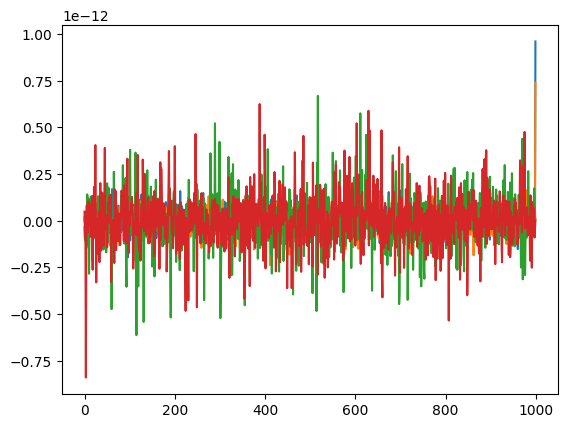

In [3]:
qtd_sample = 2
all_eeg = []
targets = []
for param_k in tqdm([-55, -85]):
    #netParams.cellParams['pyr']["secs"]["soma"]["ions"]["k"]["e"] = param_k
    for j in range(qtd_sample):
        netParams.cellParams['pyr']["secs"]["soma"]["ions"]["k"]["e"] = param_k + np.random.randn()*0.1
        netParams.stimSourceParams['bkg']['rate'] = 50+np.random.randn()*0.1
        netParams.stimSourceParams['bkg']['noise'] = 0.5+np.random.randn()*0.01
        sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)
        array, closest_elec_idx = sim.analysis.plotEEG()
#         plt.plot(array[closest_elec_idx,-1000:])
        save_array = array[closest_elec_idx,400:]
        all_eeg.append(save_array)
        targets.append(param_k)

In [8]:
df = pd.DataFrame(all_eeg)

In [10]:
df["target"]=targets

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,4591,4592,4593,4594,4595,4596,4597,4598,4599,target
0,2.259414e-14,-4.706657e-14,-3.380192e-15,5.818427e-14,2.639400e-15,1.751371e-14,2.650825e-14,-2.839642e-14,9.367413e-15,2.177495e-14,...,2.901254e-14,8.957673e-15,-5.647384e-14,-2.145458e-14,-1.473519e-14,3.127774e-14,7.771559e-14,5.473005e-14,9.590523e-13,-55
1,6.671920e-14,3.843564e-15,-5.170206e-14,-5.031787e-14,4.713072e-14,-1.211162e-13,-8.245772e-14,3.009183e-14,1.550531e-14,-1.206345e-14,...,-1.871732e-14,5.668135e-15,4.007091e-14,5.305148e-14,7.777558e-15,-5.410262e-15,3.774138e-14,2.252700e-14,7.387681e-13,-55
2,3.326394e-14,1.758720e-15,3.659188e-14,6.490329e-14,-9.770142e-14,4.308656e-13,2.004577e-13,-3.297693e-13,4.998177e-14,-4.568921e-14,...,4.597374e-14,1.007836e-14,7.029655e-15,-4.198555e-14,-3.035278e-15,1.737380e-13,1.312779e-13,4.511467e-14,4.506205e-15,-85
3,4.167854e-14,-1.447761e-13,-4.899115e-15,-3.507938e-14,8.715255e-15,1.089698e-13,2.007862e-13,-5.418284e-14,-5.843377e-15,9.777480e-14,...,-2.512769e-13,9.964778e-14,-5.263122e-14,3.653800e-14,6.879316e-14,-2.576093e-14,-8.982239e-14,-4.233922e-14,9.793141e-16,-85


In [12]:
df.to_csv("eeg_dataset.csv")